<font color="white" size="5">Lección 1: la librería numpy</font>

<font color="brown"> Crear un conjunto de datos ficticios utilizando NumPy, aplicando operaciones básicas para la preparación inicial.</font>

En esta etapa del proyecto se utilizó la librería NumPy para generar conjuntos de datos ficticios que simulan el funcionamiento de un e-commerce, aplicando distribuciones estadísticas que representan comportamientos reales de consumo. NumPy permite trabajar de manera eficiente con grandes volúmenes de datos numéricos gracias a su estructura basada en arrays y al uso de operaciones vectorizadas de alto rendimiento.

Para el dataset de clientes, se emplearon distribuciones como la normal, Poisson y lognormal con el fin de modelar fenómenos reales, tales como la edad de los clientes, la cantidad de compras realizadas y el gasto total acumulado. Estas distribuciones incorporan variabilidad natural y la presencia de valores extremos, lo que resulta especialmente relevante para las etapas posteriores del proyecto. En el caso de la variable ciudad, se utilizó una distribución no uniforme para reflejar concentraciones geográficas más realistas. Este dataset es el que posteriormente será exportado a formato CSV, desde donde será utilizado como fuente principal de información.

Asimismo, con el objetivo de enriquecer el análisis y permitir un tratamiento más completo de los datos, se utilizó NumPy para generar un dataset ficticio de transacciones, coherente con la información de clientes mediante el uso del identificador ID_Cliente. Cada transacción se encuentra asociada a un cliente específico y su monto fue distribuido de manera proporcional según la cantidad de compras realizadas. En este punto, se destaca que se tomó la decisión estratégica de que este dataset a posterior se convertirá en el Excel desde el cual se leerá esta información y se complementará con el dataset clientes.

Este enfoque permite recrear un escenario realista de análisis de datos en un entorno de e-commerce, facilitando en etapas posteriores la aplicación de técnicas de análisis temporal, detección de valores atípicos y la integración de información mediante operaciones de cruce.

Los datos generados en esta lección constituyen la base estructurada que será explorada, transformada y preparada en las siguientes fases del flujo de trabajo, asegurando coherencia entre las distintas fuentes y formatos utilizados en el proyecto.

In [1]:
import numpy as np
import pandas as pd

<b>Dataset Clientes</b>

In [2]:
# Semilla para reproducibilidad

rng = np.random.default_rng(42)

# -----------------------------
# DATASET CLIENTES E-COMMERCE
# -----------------------------

n_clientes = 500

# ID único de clientes
id_cliente = np.arange(1, n_clientes + 1)

# Nombres y apellidos
nombres_base = np.array([
    "Ana", "Sofía", "Camila", "Valentina", "Isidora", "Martina",
    "Mateo", "Josefa", "Pablo", "Benjamín", "Tomás", "Vicente", "Lucas", "Joaquín",
    "Daniela", "Fernanda", "Ignacio", "Gabriel", "Antonia", "Catalina"
])

apellidos_base = np.array([
    "González", "Céspedes", "Muñoz", "Rojas", "Díaz", "Pérez", "Soto",
    "Contreras", "Silva", "Vergara", "Martínez", "Sepúlveda", "Torres", "Flores"
])

nombre_cliente = (
    rng.choice(nombres_base, size=n_clientes) + " " +
    rng.choice(apellidos_base, size=n_clientes)
)

# Ciudades (distribución no uniforme)
ciudades = np.array([
    "Santiago", "Valparaíso", "Concepción",
    "La Serena", "Antofagasta", "Temuco", "Rancagua", "Talca"
])

ciudad_cliente = rng.choice(
    ciudades,
    size=n_clientes,
    p=[0.45, 0.12, 0.14, 0.08, 0.08, 0.08, 0.025,0.025]
)

# Edad (distribución normal acotada)
edad_cliente = np.clip(
    rng.normal(loc=35, scale=12, size=n_clientes),
    18, 70
).round(0).astype(int)

# Cantidad de compras (Poisson)
cantidad_compras = rng.poisson(lam=4.5, size=n_clientes)
cantidad_compras = np.clip(cantidad_compras, 0, 35)

# Ticket promedio por cliente (lognormal)
ticket_promedio = rng.lognormal(
    mean=np.log(25000),
    sigma=0.55,
    size=n_clientes
)

# Monto total gastado
monto_total = (cantidad_compras * ticket_promedio) + rng.normal(0, 5000, size=n_clientes)
monto_total = np.clip(monto_total, 0, None).round(0).astype(int)


<font size="4">Aplicar operaciones matemáticas básicas pata dataset clientes</font>

<font size="3">Sobre el dataset de clientes generado se aplicaron operaciones matemáticas básicas utilizando NumPy, tales como edad promedio, total compras, monto total de ventas y monto promedio por cliente. Estas operaciones permiten validar la coherencia de los datos generados y obtener una primera visión cuantitativa del comportamiento de estos datos.</font>

In [93]:
edad_promedio = np.mean(edad_cliente)
total_compras = np.sum(cantidad_compras)
monto_total_ventas = np.sum(monto_total)
monto_promedio_cliente = np.mean(monto_total)

print(f"Edad promedio: {edad_promedio}, Total de compras: {total_compras}, Monto total de ventas: {monto_total_ventas}, Monto promedio por cliente: {monto_promedio_cliente}")


Edad promedio: 35.73, Total de compras: 2221, Monto total de ventas: 65650379, Monto promedio por cliente: 131300.758


<font size="4">Generación de datos de transacciones</font>

<font size="3">Como fue mencionado en el inicio, con el objetivo de enriquecer el análisis y permitir un tratamiento más completo de los datos, se generó un dataset ficticio de transacciones coherente con la información de clientes. Cada transacción está asociada a un cliente específico a través de la variable ID_Cliente</font>.


In [4]:
# -----------------------------
# 2) TRANSACCIONES (opcional, pero recomendado)
# -----------------------------
# Genera una tabla de transacciones coherente con Cantidad_Compras y Monto_Total.
# Ojo: si Cantidad_Compras = 0, ese cliente no tendrá transacciones.

# Número total de transacciones
n_transacciones = int(cantidad_compras.sum())

# Repetimos el ID del cliente según su cantidad de compras
tx_id_cliente = np.repeat(id_cliente, cantidad_compras)

# Fechas aleatorias en los últimos 365 días
dias_atras = rng.integers(0, 365, size=n_transacciones)
tx_fecha = (
    pd.Timestamp.today().normalize()
    - pd.to_timedelta(dias_atras, unit="D")
).astype("datetime64[ns]")

# Montos por transacción: repartimos el monto total del cliente en sus compras
tx_monto = np.empty(n_transacciones, dtype=float)

start = 0
for i, c in enumerate(cantidad_compras):
    if c == 0:
        continue

    end = start + c

    # Pesos aleatorios para repartir (Dirichlet → suman 1)
    pesos = rng.dirichlet(alpha=np.ones(c) * 1.3)
    montos = pesos * monto_total[i]

    # Ruido leve y monto mínimo razonable
    montos = np.clip(
        montos + rng.normal(0, 1500, size=c),
        1500,
        None
    )

    tx_monto[start:end] = montos
    start = end

tx_monto = tx_monto.round(0).astype(int)

# Categorías ficticias
categorias = np.array([
    "Electrónica", "Hogar", "Moda",
    "Deportes", "Juguetes", "Belleza", "Alimentos"
])

tx_categoria = rng.choice(
    categorias,
    size=n_transacciones,
    p=[0.18, 0.16, 0.20, 0.12, 0.10, 0.14, 0.10]
)

<font size="4">Operaciones matemáticas básicas para dataset transacciones</font>

<font size="3">Sobre el dataset de transacciones generado se aplicaron operaciones matemáticas básicas utilizando NumPy, tales como el conteo total de transacciones, el cálculo del monto total transaccionado, el monto promedio por transacción y la identificación de valores mínimos y máximos. Estas operaciones permiten validar la coherencia de los datos generados y obtener una primera visión cuantitativa del comportamiento de las compras.</font>


In [5]:
# Cantidad total de transacciones
total_transacciones = len(tx_monto)

# Monto total transaccionado
monto_total_transacciones = np.sum(tx_monto)

# Monto promedio por transacción
monto_promedio_transaccion = np.mean(tx_monto)

# Monto mínimo y máximo por transacción
monto_minimo = np.min(tx_monto)
monto_maximo = np.max(tx_monto)

print(f"Total transacciones: {total_transacciones}, Monto total transaccionado: {monto_total_transacciones}, Monto promedio por transacción: {monto_promedio_transaccion}, Monto mínimo por transacción: {monto_minimo}, Monto máximo por transacción: {monto_maximo}")


Total transacciones: 2221, Monto total transaccionado: 65698291, Monto promedio por transacción: 29580.50022512382, Monto mínimo por transacción: 1500, Monto máximo por transacción: 389009


<font size="4">Guardar los datos generados en un archivo .npy o convertirlos a listas para usarlos luego en Panda</font>

<font size="3">Posteriormente, los datos fueron almacenados en formato .npy, lo que permite conservar una estructura eficiente y de rápida lectura para su uso posterior en la librería Pandas durante las siguientes etapas del proyecto.
En este punto y con el fin de seguir el flujo del proyecto (no incluir Dataframe aun), los datos generados mediante NumPy fueron almacenados en formato     .npz (ya que son varios arrays) como una etapa intermedia del flujo de trabajo, permitiendo conservar la estructura y los tipos de datos sin necesidad de convertirlos inmediatamente a DataFrames, optimizando el rendimiento y la modularidad del proceso.</font>

In [6]:
# -----------------------------
# Guardar dataset CLIENTES (NumPy)
# -----------------------------

np.savez(
    "clientes_numpy.npz",
    id_cliente=id_cliente,
    nombre_cliente=nombre_cliente,
    edad_cliente=edad_cliente,
    ciudad_cliente=ciudad_cliente,
    cantidad_compras=cantidad_compras,
    monto_total=monto_total
)

# -----------------------------
# Guardar dataset TRANSACCIONES (NumPy)
# -----------------------------

np.savez(
    "transacciones_numpy.npz",
    id_cliente=tx_id_cliente,
    fecha=tx_fecha,
    categoria=tx_categoria,
    monto=tx_monto
)

<font size="4">Corroboro que la información se muestre en el archivo .npz para ambos casos</font>

In [7]:
# Verifico qué contiene cliente_numpy.npz
clientes_npz = np.load("clientes_numpy.npz")
clientes_npz.files

['id_cliente',
 'nombre_cliente',
 'edad_cliente',
 'ciudad_cliente',
 'cantidad_compras',
 'monto_total']

<font size="3">En la etapa de generación de datos con NumPy no se definió un identificador explícito para las transacciones, ya que la posición de cada elemento dentro de los arrays actúa como un identificador implícito. La creación de un ID de transacción explícito se deja para etapas posteriores del proyecto, al momento de estructurar los datos en DataFrames con Pandas, donde resulta necesario para operaciones de análisis, unión de tablas y exportación.</font>

In [8]:
# Verifico que contiene transacciones_numpy.npz
tx_npz = np.load("transacciones_numpy.npz")
tx_npz.files

['id_cliente', 'fecha', 'categoria', 'monto']

<font color="white" size="5">¿Por qué NumPy es eﬁciente para el manejo de datos numéricos?</font>

NumPy es una librería fundamental para el análisis de datos en Python debido a su eficiencia en el manejo de información numérica. Sus arrays permiten almacenar grandes volúmenes de datos de manera homogénea y contigua en memoria, lo que optimiza el rendimiento y reduce el consumo de recursos.

Además, NumPy facilita la realización de operaciones matemáticas y estadísticas de forma vectorizada, evitando el uso de bucles y mejorando la legibilidad del código. Funciones como el cálculo de promedios, sumas y agregaciones permiten obtener resultados de forma rápida y precisa.

En este proyecto, NumPy se utiliza para generar un conjunto de datos ficticio de clientes y transacciones de un e-commerce, que servirá como base estructurada para su posterior exploración, limpieza y transformación utilizando la librería Pandas.

<font color="white" size="5">Lección 2: La librería pandas</font>

<font color="brown" size="4">Explorar y transformar los datos generados en la Lección 1, utilizando la estructura de DataFrame de Pandas</font>

In [9]:
import numpy as np
import pandas as pd

<font size="4">Leer los datos preparados en NumPy y convertirlos en un DataFrame.</font>

Dataframe Clientes

In [10]:
#Leer los datos preparados en NumPy y convertirlos en un DataFrame
#CLIENTES

clientes = pd.DataFrame({
    "ID_Cliente": clientes_npz["id_cliente"],
    "Nombre": clientes_npz["nombre_cliente"],
    "Edad": clientes_npz["edad_cliente"],
    "Ciudad": clientes_npz["ciudad_cliente"],
    "Cantidad_Compras": clientes_npz["cantidad_compras"],
    "Monto_Total": clientes_npz["monto_total"]
})

clientes.head(10)


,ID_Cliente,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total
0,1,Sofía Céspedes,26,La Serena,3,86427
1,2,Fernanda Vergara,46,Temuco,5,114303
2,3,Joaquín Flores,35,Temuco,3,43599
3,4,Pablo Torres,32,Valparaíso,6,101303
4,5,Pablo Rojas,34,Valparaíso,3,144745
5,6,Gabriel Soto,38,Antofagasta,4,106510
6,7,Sofía Contreras,42,Santiago,6,83749
7,8,Joaquín Rojas,23,Antofagasta,4,115258
8,9,Isidora Rojas,23,Valparaíso,3,76806
9,10,Sofía Rojas,48,Santiago,8,1333744


Dataframe transacciones

In [11]:
#Leer los datos preparados en NumPy y convertirlos en un DataFrame
#TRANSACCIONES
transacciones = pd.DataFrame({
    "ID_Cliente": tx_npz["id_cliente"],
    "Fecha": tx_npz["fecha"],
    "Categoria": tx_npz["categoria"],
    "Monto": tx_npz["monto"]
})

#Se crea Id de transacción que había quedado pendiente
transacciones["ID_Transaccion"] = np.arange(1, len(transacciones) + 1)

transacciones.head(10)


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion
0,1,2025-07-05,Alimentos,21363,1
1,1,2025-03-22,Hogar,25454,2
2,1,2025-02-06,Alimentos,43234,3
3,2,2025-06-30,Deportes,23663,4
4,2,2025-09-29,Alimentos,11319,5
5,2,2025-09-03,Alimentos,26419,6
6,2,2025-04-09,Deportes,41672,7
7,2,2025-09-02,Alimentos,11121,8
8,3,2025-07-30,Belleza,4927,9
9,3,2025-11-26,Moda,12771,10


<font size="4">Se realiza una exploración inicial: </font>

<font size="3">● Se visualizan las primeras y últimas ﬁlas.</font>

<font size="3">● Obtener estadísticas descriptivas.</font>

<font size="3">● Aplicar ﬁltros condicionales</font>

<font color="brown" size="4">Exploración inicial Dataframe clientes

Dimensiones del Dataset clientes, 500 filas y 6 columnas

In [12]:
clientes.shape

(500, 6)

Visualizar primeras y últimas filas dataset clientes

In [13]:
clientes.head(), clientes.tail()

(   ID_Cliente            Nombre  Edad      Ciudad  Cantidad_Compras  \
 0           1    Sofía Céspedes    26   La Serena                 3   
 1           2  Fernanda Vergara    46      Temuco                 5   
 2           3    Joaquín Flores    35      Temuco                 3   
 3           4      Pablo Torres    32  Valparaíso                 6   
 4           5       Pablo Rojas    34  Valparaíso                 3   
 
    Monto_Total  
 0        86427  
 1       114303  
 2        43599  
 3       101303  
 4       144745  ,
      ID_Cliente            Nombre  Edad      Ciudad  Cantidad_Compras  \
 495         496       Pablo Silva    25    Santiago                 4   
 496         497  Camila Contreras    41  Concepción                 3   
 497         498      Josefa Pérez    47    Santiago                 3   
 498         499    Antonia Flores    35       Talca                 1   
 499         500   Pablo Contreras    20    Santiago                 4   
 
      Monto

Imprimo información general y tipo de datos, lo que indica: la cantidad de no nulos, tipo de datos de cada variable, cantidad de columnas y entradas

In [14]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Cliente        500 non-null    int64 
 1   Nombre            500 non-null    object
 2   Edad              500 non-null    int64 
 3   Ciudad            500 non-null    object
 4   Cantidad_Compras  500 non-null    int64 
 5   Monto_Total       500 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 23.6+ KB


Estadistica descriptiva del dataset clientes: contador, media, desviación estándar, min, max, entre otros.

In [15]:
clientes.describe()

,ID_Cliente,Edad,Cantidad_Compras,Monto_Total
count,500.000000,500.000000,500.000000,5.000000e+02
mean,250.500000,35.730000,4.442000,1.313008e+05
std,144.481833,11.210551,2.113663,1.121736e+05
min,1.000000,18.000000,0.000000,1.751000e+03
25%,125.750000,27.750000,3.000000,6.206750e+04
50%,250.500000,35.000000,4.000000,1.029700e+05
75%,375.250000,43.000000,6.000000,1.664418e+05
max,500.000000,69.000000,13.000000,1.333744e+06


<font color="brown" size="4">Exploración inicial Dataframe transacciones

Dimensión del Dataset transacciones: 2221 filas y 5 columnas

In [16]:
transacciones.shape

(2221, 5)

Visualizar primeras y últimas filas dataset transacciones

In [17]:
transacciones.head(), transacciones.tail()


(   ID_Cliente      Fecha  Categoria  Monto  ID_Transaccion
 0           1 2025-07-05  Alimentos  21363               1
 1           1 2025-03-22      Hogar  25454               2
 2           1 2025-02-06  Alimentos  43234               3
 3           2 2025-06-30   Deportes  23663               4
 4           2 2025-09-29  Alimentos  11319               5,
       ID_Cliente      Fecha    Categoria  Monto  ID_Transaccion
 2216         499 2025-08-31         Moda   3813            2217
 2217         500 2025-12-19  Electrónica   6654            2218
 2218         500 2025-02-25     Deportes   1502            2219
 2219         500 2025-03-24    Alimentos   4499            2220
 2220         500 2025-03-12         Moda  25300            2221)

Información general y tipo de datos

In [18]:
transacciones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Cliente      2221 non-null   int64         
 1   Fecha           2221 non-null   datetime64[ns]
 2   Categoria       2221 non-null   object        
 3   Monto           2221 non-null   int64         
 4   ID_Transaccion  2221 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 86.9+ KB


Estadistica descriptiva

In [19]:
transacciones.describe()


,ID_Cliente,Fecha,Monto,ID_Transaccion
count,2221.000000,2221,2221.000000,2221.000000
mean,248.651058,2025-08-05 11:53:11.535344384,29580.500225,1111.000000
min,1.000000,2025-02-05 00:00:00,1500.000000,1.000000
25%,125.000000,2025-05-07 00:00:00,9501.000000,556.000000
50%,244.000000,2025-08-04 00:00:00,20313.000000,1111.000000
75%,376.000000,2025-11-03 00:00:00,37840.000000,1666.000000
max,500.000000,2026-02-04 00:00:00,389009.000000,2221.000000
std,144.614568,NaN,31108.336840,641.291795


In [20]:
#Incluyo estadistica para categoría
transacciones.describe(include="object")


,Categoria
count,2221
unique,7
top,Moda
freq,415


<font size="5">Aplicar filtros condicionales</font>

Clientes con más de 10 compras:

In [21]:
clientes[clientes["Cantidad_Compras"] > 10]


,ID_Cliente,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total
364,365,Camila Sepúlveda,22,Santiago,12,228862
368,369,Ana Soto,57,Santiago,12,131047
405,406,Tomás Vergara,40,Concepción,13,379598


Clientes sin compras:

In [22]:
clientes[clientes["Cantidad_Compras"] == 0]

,ID_Cliente,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total
164,165,Pablo Silva,32,Santiago,0,1751


Transacciones mayores a 100000:

In [23]:
transacciones[transacciones["Monto"] > 100000]


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion
37,10,2025-03-28,Electrónica,132414,38
38,10,2025-09-07,Hogar,154646,39
39,10,2025-09-18,Electrónica,103452,40
40,10,2025-02-10,Belleza,284852,41
41,10,2025-05-04,Alimentos,389009,42
...,...,...,...,...,...
2167,487,2025-12-11,Hogar,193015,2168
2170,487,2025-07-27,Belleza,133829,2171
2171,487,2025-03-23,Electrónica,118278,2172
2195,492,2025-05-02,Belleza,101532,2196


Transacciones sin monto (no existen): 

In [24]:
transacciones[transacciones["Monto"] <= 0]


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion


Con el objetivo de simular un escenario real de trabajo, se introdujeron de manera controlada valores nulos, duplicados, formatos inconsistentes y valores atípicos en los datasets generados.

In [25]:
# -----------------------------
# 3) ENSUCIAR DATOS (para Lección 4 y 5)
# -----------------------------

# A) NULOS en clientes
idx_null_edad = rng.choice(clientes.index, size=int(0.03 * n_clientes), replace=False)
clientes.loc[idx_null_edad, "Edad"] = np.nan

idx_null_ciudad = rng.choice(clientes.index, size=int(0.02 * n_clientes), replace=False)
clientes.loc[idx_null_ciudad, "Ciudad"] = None

# B) Formato inconsistente en Ciudad (mayúsculas / minúsculas / espacios)
idx_messy_city = rng.choice(clientes.index, size=int(0.05 * n_clientes), replace=False)
clientes.loc[idx_messy_city, "Ciudad"] = (
    clientes.loc[idx_messy_city, "Ciudad"]
    .astype(str)
    .str.upper()
    .str.strip()
)

idx_spaces_city = rng.choice(clientes.index, size=int(0.03 * n_clientes), replace=False)
clientes.loc[idx_spaces_city, "Ciudad"] = clientes.loc[idx_spaces_city, "Ciudad"].astype(str) + "  "

# C) Outliers en Edad (unos pocos)
idx_out_edad = rng.choice(clientes.index, size=4, replace=False)
clientes.loc[idx_out_edad, "Edad"] = [0, 120, 150, 95]

# D) NULOS en transacciones (Categoria)
idx_null_cat = rng.choice(transacciones.index, size=int(0.02 * len(transacciones)), replace=False)
transacciones.loc[idx_null_cat, "Categoria"] = None

# E) Formato inconsistente en Fecha: convertir algunas a string con formato distinto
idx_str_fecha = rng.choice(transacciones.index, size=int(0.03 * len(transacciones)), replace=False)
transacciones.loc[idx_str_fecha, "Fecha"] = transacciones.loc[idx_str_fecha, "Fecha"].dt.strftime("%d-%m-%Y")

# F) Outliers en Monto: inflar algunos montos
idx_out_monto = rng.choice(transacciones.index, size=max(5, int(0.005 * len(transacciones))), replace=False)
transacciones.loc[idx_out_monto, "Monto"] = transacciones.loc[idx_out_monto, "Monto"] * 30

# G) Duplicados en transacciones: duplicar algunas filas
dup_rows = transacciones.sample(frac=0.02, random_state=42)
transacciones = pd.concat([transacciones, dup_rows], ignore_index=True)

# (opcional) mezclar filas
transacciones = transacciones.sample(frac=1, random_state=42).reset_index(drop=True)


Realizo una comprobación en ambos dataset, de que fue realizado el 'ensuciado', verificando valores nulos, duplicados y formato de datos inconsistentes

In [26]:
#Compruebo el ensuciado
print("Nulos en clientes:")
display(clientes.isna().sum())

print("\nDuplicados en transacciones:")
print(transacciones.duplicated().sum())

print("\nEjemplo de ciudades con formato inconsistente:")
display(clientes["Ciudad"].value_counts().head(10))


Nulos en clientes:


ID_Cliente           0
Nombre               0
Edad                15
Ciudad              10
Cantidad_Compras     0
Monto_Total          0
dtype: int64


Duplicados en transacciones:
44

Ejemplo de ciudades con formato inconsistente:


Ciudad
Santiago       208
Valparaíso      52
Concepción      52
La Serena       39
Antofagasta     38
Temuco          37
Talca           12
Rancagua        12
SANTIAGO        11
Santiago         7
Name: count, dtype: int64

<font size="4">Guardar DataFrames preliminares en CSV y en Excel</font>

En este punto se guarda el dataset 'clientes' en formato CSV por ser el dataset principal de este proyecto, y como se había decidido estratégicamente, en este momento el dataset 'transacciones' se convierte a Excel para ser ocupado como documento base para la lección 3 y poder posteriormente unificar datos.


In [27]:
clientes.to_csv("clientes_ecommerce_preliminar.csv",index=False, encoding="utf-8-sig")

transacciones.to_excel("transacciones_ecommerce_preliminar.xlsx",index=False)

<font color="white" size="5">Redactar un documento breve describiendo los hallazgos y la utilidad de Pandas para la manipulación de datos</font>

<p style= "text-align: justify; ">
En esta etapa del proyecto se utilizaron estructuras de DataFrame de la librería Pandas para cargar y explorar los datos generados previamente con NumPy. Pandas permite organizar la información en formato tabular, facilitando la visualización, el análisis descriptivo y la aplicación de filtros condicionales.

Mediante funciones como head(), tail(), info() y describe(), fue posible obtener una primera comprensión de la estructura del dataset, identificar tipos de datos, rangos de valores y posibles inconsistencias que deberán abordarse en etapas posteriores. Asimismo, la aplicación de filtros permitió validar comportamientos esperados, como clientes con mayor volumen de compras o transacciones de alto monto.

Finalmente, los DataFrames preliminares fueron exportados a formato CSV y Excel, quedando listos para su integración y para la aplicación de técnicas de limpieza y transformación en las siguientes lecciones.


<font color="white" size="5">Lección 3: Obtención de datos desde archivos</font>

<font color="brown"> Integrar datos de diversas fuentes y uniﬁcarlos en un solo DataFrame para su posterior limpieza.</font>


Integrar datos provenientes de archivos CSV, Excel y una página web, unificándolos en estructuras que servirán como base para los procesos de limpieza y transformación posteriores.

CONTEXTO: 

El dataset de clientes fue exportado previamente a CSV.

El dataset de transacciones fue exportado a Excel.

Los valores del dólar serán obtenidos directamente desde el sitio web del SII, utilizando read_html().

In [28]:
import pandas as pd
import requests
from io import StringIO


Se cargan los datos desde archivo CSV (clientes) y se nombra como df_clientes

In [29]:
df_clientes = pd.read_csv("clientes_ecommerce_preliminar.csv")
df_clientes.head()

,ID_Cliente,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total
0,1,Sofía Céspedes,26.0,La Serena,3,86427
1,2,Fernanda Vergara,46.0,Temuco,5,114303
2,3,Joaquín Flores,35.0,Temuco,3,43599
3,4,Pablo Torres,32.0,Valparaíso,6,101303
4,5,Pablo Rojas,34.0,Valparaíso,3,144745


Se cargan los datos desde archivo Excel (transacciones) y se nombra como df_transacciones

In [30]:
df_transacciones = pd.read_excel("transacciones_ecommerce_preliminar.xlsx")    
df_transacciones.head()

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion
0,394,2025-05-16,Electrónica,9693,1756
1,287,2025-04-27,Belleza,10997,1282
2,76,2026-01-27,Alimentos,90194,351
3,92,2025-10-11,Electrónica,36177,421
4,13,2025-12-01,Juguetes,44409,57


Obtención de datos desde página web SII: se obtienen datos del valor del dólar en el año 2025

In [31]:
url= "https://www.sii.cl/valores_y_fechas/dolar/dolar2025.htm"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0 Safari/537.36",
    "Accept-Language": "es-ES,es;q=0.9"
}
#realiza solicitud y extrae el contenido HTML de la página en formato texto.
html = requests.get(url, headers=headers, timeout=30).text
#Le indico que decimal es , y miles .
tabla_dolar = pd.read_html(StringIO(html),decimal=",",thousands=".")


Debido a que la página web del SII contiene múltiples tablas HTML, fue necesario inspeccionar y seleccionar explícitamente la tabla correspondiente a los valores diarios del dólar. Este proceso permitió asegurar que los datos extraídos correspondieran efectivamente a la información requerida para el análisis.

In [32]:
#Verifico cantidad de tablas existentes en la página
len(tabla_dolar)

13

Identifico la tabla correcta, buscando la que contiene el mes de Enero, ya que las otras contenían números

In [33]:
for i, tabla in enumerate(tabla_dolar):
    if tabla.columns.astype(str).str.contains("Ene").any():
        print(f"👉 Tabla correcta encontrada en índice: {i}")
        display(tabla.head())
        break


👉 Tabla correcta encontrada en índice: 12


,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,NaN,NaN,NaN,953.07,NaN,NaN,933.42,976.80,965.28,962.39,NaN,928.16
1,2,996.46,NaN,NaN,946.28,955.67,941.97,926.62,NaN,968.35,959.19,NaN,927.95
2,3,999.84,984.22,954.22,949.83,NaN,939.65,926.51,NaN,974.13,961.54,943.69,925.37
3,4,NaN,987.12,953.11,946.59,NaN,941.53,927.87,967.48,969.46,NaN,940.53,919.46
4,5,NaN,977.58,948.87,NaN,940.95,936.89,NaN,964.28,971.22,NaN,945.13,918.15


Se verifica que la tabla buscada es la tabla número 12

Copio la tabla, nombrándola como df_dolar y la imprimo

In [34]:
df_dolar = tabla_dolar[12].copy()
df_dolar.head(10)

,Día,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic
0,1,NaN,NaN,NaN,953.07,NaN,NaN,933.42,976.80,965.28,962.39,NaN,928.16
1,2,996.46,NaN,NaN,946.28,955.67,941.97,926.62,NaN,968.35,959.19,NaN,927.95
2,3,999.84,984.22,954.22,949.83,NaN,939.65,926.51,NaN,974.13,961.54,943.69,925.37
3,4,NaN,987.12,953.11,946.59,NaN,941.53,927.87,967.48,969.46,NaN,940.53,919.46
4,5,NaN,977.58,948.87,NaN,940.95,936.89,NaN,964.28,971.22,NaN,945.13,918.15
5,6,1011.82,969.47,936.70,NaN,940.18,930.79,NaN,966.02,NaN,963.17,945.60,NaN
6,7,1010.98,967.59,926.52,975.82,939.67,NaN,932.34,976.42,NaN,963.09,940.84,NaN
7,8,1005.85,NaN,NaN,990.68,945.44,NaN,940.28,971.88,964.58,961.61,NaN,NaN
8,9,1007.51,NaN,NaN,993.89,941.22,933.91,945.39,NaN,967.07,951.45,NaN,920.02
9,10,1003.92,960.60,928.25,1000.01,NaN,937.09,948.33,NaN,966.35,948.77,946.24,926.89


La tabla de valores del dólar obtenida desde el sitio web del Servicio de Impuestos Internos (SII) se encontraba estructurada con los días del mes como filas y los meses del año como columnas. Por este motivo, fue necesario reestructurar el dataset desde formato ancho a formato largo utilizando la función melt(). Posteriormente, se construyó una variable de fecha combinando año, mes y día, permitiendo ordenar cronológicamente la información y dejarla en un formato compatible con el dataset de transacciones.

In [35]:
#Pasar de formato ancho a formato largo (melt)
df_dolar_largo = df_dolar.melt(
    id_vars="Día",
    var_name="Mes",
    value_name="Valor_Dolar"
)
df_dolar_largo.head(10)

,Día,Mes,Valor_Dolar
0,1,Ene,NaN
1,2,Ene,996.46
2,3,Ene,999.84
3,4,Ene,NaN
4,5,Ene,NaN
5,6,Ene,1011.82
6,7,Ene,1010.98
7,8,Ene,1005.85
8,9,Ene,1007.51
9,10,Ene,1003.92


In [36]:
#Convertir nombre de meses a números
meses = {
    "Ene": 1,
    "Feb": 2,
    "Mar": 3,
    "Abr": 4,
    "May": 5,
    "Jun": 6,
    "Jul": 7,
    "Ago": 8,
    "Sep": 9,
    "Oct": 10,
    "Nov": 11,
    "Dic": 12
}

df_dolar_largo["Mes_num"] = df_dolar_largo["Mes"].map(meses)
df_dolar_largo.head(25)


,Día,Mes,Valor_Dolar,Mes_num
0,1,Ene,NaN,1
1,2,Ene,996.46,1
2,3,Ene,999.84,1
3,4,Ene,NaN,1
4,5,Ene,NaN,1
5,6,Ene,1011.82,1
6,7,Ene,1010.98,1
7,8,Ene,1005.85,1
8,9,Ene,1007.51,1
9,10,Ene,1003.92,1


Se utilizó la función pd.to_datetime() con un diccionario que especifica año, mes y día, lo que permitió construir fechas válidas de forma robusta a partir de columnas separadas.

In [37]:
#Crear columna con fecha en formato que concuerde con la del otro archivo
df_dolar_largo["Fecha"] = pd.to_datetime(
    dict(
        year=2025,
        month=df_dolar_largo["Mes_num"],
        day=df_dolar_largo["Día"]
    ),
    errors="coerce"
)

df_dolar_largo.head(20)

,Día,Mes,Valor_Dolar,Mes_num,Fecha
0,1,Ene,NaN,1,2025-01-01
1,2,Ene,996.46,1,2025-01-02
2,3,Ene,999.84,1,2025-01-03
3,4,Ene,NaN,1,2025-01-04
4,5,Ene,NaN,1,2025-01-05
5,6,Ene,1011.82,1,2025-01-06
6,7,Ene,1010.98,1,2025-01-07
7,8,Ene,1005.85,1,2025-01-08
8,9,Ene,1007.51,1,2025-01-09
9,10,Ene,1003.92,1,2025-01-10


Ordeno cronológicamente por fecha

In [38]:
df_dolar_largo = df_dolar_largo.sort_values("Fecha")
df_dolar_largo.head(10)

,Día,Mes,Valor_Dolar,Mes_num,Fecha
0,1,Ene,NaN,1,2025-01-01
1,2,Ene,996.46,1,2025-01-02
2,3,Ene,999.84,1,2025-01-03
3,4,Ene,NaN,1,2025-01-04
4,5,Ene,NaN,1,2025-01-05
5,6,Ene,1011.82,1,2025-01-06
6,7,Ene,1010.98,1,2025-01-07
7,8,Ene,1005.85,1,2025-01-08
8,9,Ene,1007.51,1,2025-01-09
9,10,Ene,1003.92,1,2025-01-10


Se crea un Dataframe final del dólar listo para el cruce, éste incluye solo la fecha y el valor del dólar

In [39]:
df_dolar_final = df_dolar_largo[["Fecha", "Valor_Dolar"]]

df_dolar_final.head()

,Fecha,Valor_Dolar
0,2025-01-01,NaN
1,2025-01-02,996.46
2,2025-01-03,999.84
3,2025-01-04,NaN
4,2025-01-05,NaN


Antes de seguir, aseguro que en el dataframe transacciones la fecha esté como datetime

In [40]:
df_transacciones["Fecha"] = pd.to_datetime(df_transacciones["Fecha"])

Se realiza el primer cruce de dataframes, será transacciones+clientes, cruzando la clave ID_Cliente

In [41]:
#Primer cruce: Transacciones + Clientes
df_tx_clientes = df_transacciones.merge(
    df_clientes,
    on="ID_Cliente",
    how="left"
)
df_tx_clientes.head(10)

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total
0,394,2025-05-16,Electrónica,9693,1756,Vicente Flores,30.0,Santiago,2,12903
1,287,2025-04-27,Belleza,10997,1282,Valentina González,39.0,Antofagasta,6,184961
2,76,2026-01-27,Alimentos,90194,351,Benjamín Pérez,43.0,Valparaíso,6,242674
3,92,2025-10-11,Electrónica,36177,421,Ignacio Torres,NaN,Santiago,4,50116
4,13,2025-12-01,Juguetes,44409,57,Daniela Sepúlveda,40.0,Santiago,8,436526
5,353,2025-10-27,Moda,37394,1557,Martina Flores,49.0,Antofagasta,4,96110
6,190,2025-07-09,Deportes,11832,846,Mateo Martínez,35.0,Valparaíso,4,102301
7,374,2026-01-05,Hogar,40083,1658,Josefa Céspedes,25.0,Santiago,5,293670
8,24,2025-09-02,Electrónica,6029,112,Antonia Sepúlveda,45.0,Concepción,4,73085
9,467,2025-03-29,Electrónica,48655,2075,Valentina Silva,18.0,Rancagua,5,234537


Durante la integración de datos, se identificó que un cliente no presentaba transacciones asociadas. El cruce inicial se realizó tomando como base el dataset de transacciones, este cliente no fue incluido (por la aplicación del código) en el DataFrame unificado, ya que no poseía transacciones, ni categoría, ni fecha, ni monto y el total de compras era = a 0. Esta decisión es coherente con el objetivo analítico del dataset, centrado en el análisis de comportamiento transaccional.

Verifico el tamaño del dataframe que incluye ambos dataset, éste tiene 2265 filas y 10 columnas. Cada transacción ahora tiene: datos del cliente y se mantiene el número de transacciones.

In [42]:
df_tx_clientes.shape

(2265, 10)

In [43]:
df_transacciones.shape

(2265, 5)

Se realiza un segundo cruce entre el nuevo Dataframe (transacciones+clientes) y el dataframe del valor del dólar

In [44]:
#Segundo cruce: (Transacciones + Clientes) + Dólar
df_unificado = df_tx_clientes.merge(
    df_dolar_final,
    on="Fecha",
    how="left"
)
df_unificado.head(10)

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar
0,394,2025-05-16,Electrónica,9693,1756,Vicente Flores,30.0,Santiago,2,12903,940.25
1,287,2025-04-27,Belleza,10997,1282,Valentina González,39.0,Antofagasta,6,184961,NaN
2,76,2026-01-27,Alimentos,90194,351,Benjamín Pérez,43.0,Valparaíso,6,242674,NaN
3,92,2025-10-11,Electrónica,36177,421,Ignacio Torres,NaN,Santiago,4,50116,NaN
4,13,2025-12-01,Juguetes,44409,57,Daniela Sepúlveda,40.0,Santiago,8,436526,928.16
5,353,2025-10-27,Moda,37394,1557,Martina Flores,49.0,Antofagasta,4,96110,943.47
6,190,2025-07-09,Deportes,11832,846,Mateo Martínez,35.0,Valparaíso,4,102301,945.39
7,374,2026-01-05,Hogar,40083,1658,Josefa Céspedes,25.0,Santiago,5,293670,NaN
8,24,2025-09-02,Electrónica,6029,112,Antonia Sepúlveda,45.0,Concepción,4,73085,968.35
9,467,2025-03-29,Electrónica,48655,2075,Valentina Silva,18.0,Rancagua,5,234537,NaN


In [45]:
#Dimensiones del DataFrame unificado, para validar si se realizó bien, ya que debe tener la misma cantidad de filas que transacciones.
df_unificado.shape


(2265, 11)

<p style= "text-align: justify; "> Se unificaron las distintas fuentes de datos en un único DataFrame mediante operaciones de unión (merge). En primer lugar, se integraron los datos de clientes con las transacciones utilizando el identificador del cliente como clave primaria. Posteriormente, se incorporaron los valores diarios del dólar obtenidos desde el sitio web del SII, utilizando la fecha de la transacción como clave de unión. Este proceso permitió consolidar información de distintas fuentes en un solo dataset, facilitando el análisis posterior.

<font size="4">Guardar DataFrame unificado en CSV y en Excel</font>

In [46]:
#Guardar dataframe unificado a CSV
df_unificado.to_csv(
    "dataset_unificado_ecommerce.csv",
    index=False,
    encoding="utf-8-sig"
)
#Guardar dataframe unificado a excel
df_unificado.to_excel(
    "dataset_unificado.xlsx",
    index=False
)

<h3>Documentar los desafíos encontrados al obtener datos de distintos formatos</h3>
<p style= "text-align: justify; "> 
Durante la obtención de datos desde distintas fuentes se identificaron diversos desafíos técnicos que requirieron la toma de decisiones específicas para asegurar la correcta integración de la información.

Uno de los principales desafíos fue la heterogeneidad de formatos entre los archivos Excel, CSV y la fuente web. Para abordar esta situación, se realizaron exploraciones iniciales de cada dataset utilizando métodos como head() y shape(), lo que permitió comprender su estructura antes de cualquier proceso de integración.

La extracción de datos desde la página web del SII presentó la dificultad de que la función read_html() devuelve múltiples tablas sin un orden garantizado. Ante esto, se optó por implementar un criterio de búsqueda basado en el contenido de las columnas, para conocer cuál era el número de tabla que se utilizaría.

Adicionalmente, la estructura no convencional de la tabla del dólar, con los días como filas y los meses como columnas, requirió una transformación desde formato ancho a formato largo mediante la función melt(). Esta decisión permitió representar cada observación como una combinación única de fecha y valor, facilitando su integración con los datos de transacciones.

Otro desafío relevante fue la construcción de una variable de fecha válida, dado que la información temporal se encontraba distribuida en distintas columnas y formatos. Para resolverlo, se decidió convertir los nombres de los meses a valores numéricos y utilizar pd.to_datetime() con un diccionario que especifica explícitamente año, mes y día, garantizando la generación de fechas correctas y la detección automática de fechas inválidas.

Finalmente, al momento de unificar las fuentes de datos, se identificó la necesidad de mantener la consistencia entre las claves de unión, esto es, en los identificadores de cliente y el formato de las fechas. Esta decisión técnica permitió realizar cruces confiables mediante operaciones merge, asegurando la coherencia del DataFrame final.

<font color="white" size="5">Lección 4 - Manejo de valores perdidos y outliers</font>

<font color="brown"> Aplicar técnicas de limpieza de datos, resolviendo problemas de valores nulos y datos atípicos.</font>


In [47]:
#Imprimimos el DataFrame unificado
df_unificado.head()

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar
0,394,2025-05-16,Electrónica,9693,1756,Vicente Flores,30.0,Santiago,2,12903,940.25
1,287,2025-04-27,Belleza,10997,1282,Valentina González,39.0,Antofagasta,6,184961,NaN
2,76,2026-01-27,Alimentos,90194,351,Benjamín Pérez,43.0,Valparaíso,6,242674,NaN
3,92,2025-10-11,Electrónica,36177,421,Ignacio Torres,NaN,Santiago,4,50116,NaN
4,13,2025-12-01,Juguetes,44409,57,Daniela Sepúlveda,40.0,Santiago,8,436526,928.16


Realizo una exploración inicial del dataframe unificado, observando tipos de datos (int, float, object, datetime), columnas con valores nulos y tamaño del dataset

In [48]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Cliente        2265 non-null   int64         
 1   Fecha             2265 non-null   datetime64[ns]
 2   Categoria         2219 non-null   object        
 3   Monto             2265 non-null   int64         
 4   ID_Transaccion    2265 non-null   int64         
 5   Nombre            2265 non-null   object        
 6   Edad              2179 non-null   float64       
 7   Ciudad            2229 non-null   object        
 8   Cantidad_Compras  2265 non-null   int64         
 9   Monto_Total       2265 non-null   int64         
 10  Valor_Dolar       1367 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 194.8+ KB


Se realiza conteo de nulos por columna

In [49]:
df_unificado.isna().sum()


ID_Cliente            0
Fecha                 0
Categoria            46
Monto                 0
ID_Transaccion        0
Nombre                0
Edad                 86
Ciudad               36
Cantidad_Compras      0
Monto_Total           0
Valor_Dolar         898
dtype: int64

El tratamiento de valores nulos para el caso del dólar será rellenar con último valor dado, ya que me percato que no cambia los findes de semana

In [50]:
#ordeno por fecha
df_unificado = df_unificado.sort_values("Fecha")

df_unificado["Valor_Dolar"] = (
    df_unificado["Valor_Dolar"]
    .ffill()
    .bfill()
)
#Fue necesario complementar el proceso utilizando propagación hacia atrás (bfill), asegurando así la asignación de un valor coherente sin perder la continuidad temporal de la serie.

#Imprimo nuevamente suma de nulos para verificar que no hayan quedado nulos en Valor_Dolar
df_unificado["Valor_Dolar"].isna().sum()


np.int64(0)

Atendido que en la variable categoría son 46 nulos, se decide crear una nueva categoría llamada "Desconocido". Esta decisión se basa en no distorsionar las frecuencias reales y mantener trazabilidad de los datos

In [51]:
df_unificado["Categoria"] = df_unificado["Categoria"].fillna("Desconocido")
df_unificado["Categoria"].isna().sum()

np.int64(0)

Para la categoría edad se encuentran 86 nulos, se decide imputar por la mediana de los datos, ya que es menos sensible a outliers y es más robusta para edades

In [52]:
mediana_edad = df_unificado["Edad"].median()

df_unificado["Edad"] = df_unificado["Edad"].fillna(mediana_edad)
df_unificado["Edad"].isna().sum()

np.int64(0)

Para el caso de la variable Ciudad al ser categórica, se decide rellenar con la moda, atendido que los nulos corresponden a menos del 2% de los datos

In [53]:
moda_ciudad = df_unificado["Ciudad"].mode()[0]
df_unificado["Ciudad"] = df_unificado["Ciudad"].fillna(moda_ciudad)

df_unificado["Ciudad"].isna().sum()

np.int64(0)

Compruebo con nulos totales para verificar las imputaciones realizadas

In [54]:
df_unificado.isna().sum()


ID_Cliente          0
Fecha               0
Categoria           0
Monto               0
ID_Transaccion      0
Nombre              0
Edad                0
Ciudad              0
Cantidad_Compras    0
Monto_Total         0
Valor_Dolar         0
dtype: int64

<b>Detectar outliers utilizando técnicas como IQR y Z-score.</b>

Se analizan outliers en Monto (transacciones), Monto_Total (clientes) y Edad.

<b> En primer lugar se realiza el análisis para el monto, que se refiere al monto por transacción, el que permite ver el comportamiento puntual respecto a una compra</b>

<font color= "brown"><b>Método del Rango Intercuartil (IQR):</b></font>
Este método busca valores que se escapan del rango donde vive el 50% central de los datos.

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
Q1 = df_unificado["Monto"].quantile(0.25)
Q3 = df_unificado["Monto"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_iqr = df_unificado[
    (df_unificado["Monto"] < limite_inferior) |
    (df_unificado["Monto"] > limite_superior)
]

print("Outliers detectados (IQR):", outliers_iqr.shape[0])


Outliers detectados (IQR): 154


Esto indica que 154 datos son atípicos, esto es, se desvían significativamente de la región central de la distribución y pueden representar observaciones inusuales o anómalas

<b>Z-score para Monto</b><br>
Aquí medimos qué tan lejos está un valor respecto a la media, en unidades de desviación estándar.

In [57]:
from scipy.stats import zscore

df_unificado["z_monto"] = zscore(df_unificado["Monto"])

outliers_z = df_unificado[
    np.abs(df_unificado["z_monto"])> 3
]

print("Outliers detectados en Monto (Z-score):", outliers_z.shape[0])


Outliers detectados en Monto (Z-score): 9


La aplicación del método Z-score permitió identificar 9 observaciones con valores que se alejan más de tres desviaciones estándar respecto de la media

In [58]:
# limpio columna auxiliar
df_unificado = df_unificado.drop(columns=["z_monto"])

<b>Diagrama de caja (Boxplot) para la variable Monto (transacciones)</b><br>

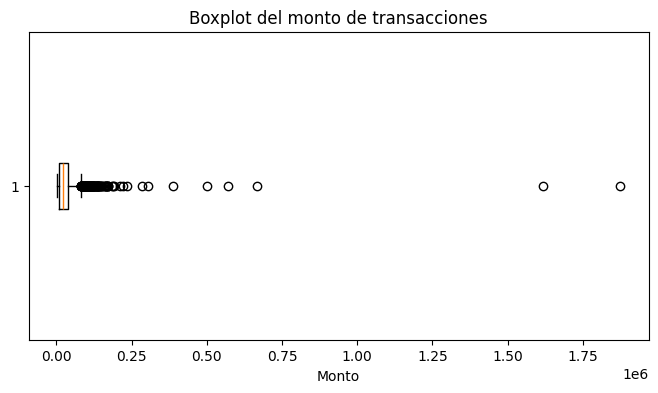

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(df_unificado["Monto"], vert=False)
plt.title("Boxplot del monto de transacciones")
plt.xlabel("Monto")
plt.show()


<b> Realizamos el mismo análisis para el monto_total que se refiere al comportamiento acumulado del cliente, lo que ha comprado o "gastado", sería un outlier estratégico porque se reconocerían clientes de 'alto valor' </b>

In [60]:
Q1 = df_clientes["Monto_Total"].quantile(0.25)
Q3 = df_clientes["Monto_Total"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_clientes["outlier_monto_total"] = (
    (df_clientes["Monto_Total"] < lim_inf) |
    (df_clientes["Monto_Total"] > lim_sup)
)
print("Outliers en Monto_Total de clientes:", df_clientes["outlier_monto_total"].sum())

Outliers en Monto_Total de clientes: 27


<b>Z-score para Monto_Total</b><br>

In [61]:
from scipy.stats import zscore

# Calcular Z-score
df_clientes["z_monto_total"] = zscore(df_clientes["Monto_Total"])

# Identificar outliers (|Z| > 3)
outliers_z_monto_total = df_clientes[
    df_clientes["z_monto_total"].abs() > 3
]

outliers_z_monto_total.shape
print("Outliers detectados en Monto_Total (Z-score):", outliers_z_monto_total.shape[0])

Outliers detectados en Monto_Total (Z-score): 6


In [62]:
# limpio columna auxiliar
df_clientes = df_clientes.drop(columns=["z_monto_total"])

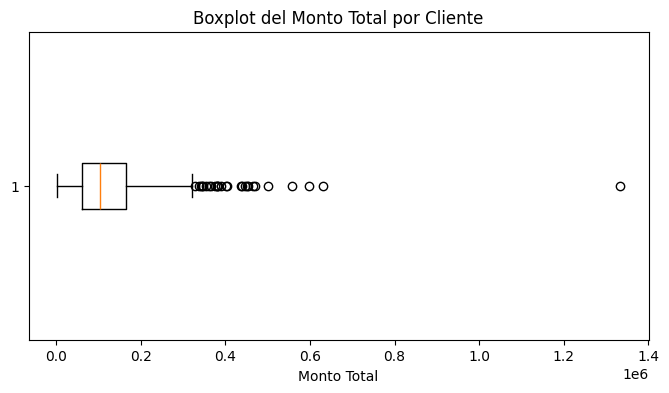

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.boxplot(df_clientes["Monto_Total"], vert=False)
plt.title("Boxplot del Monto Total por Cliente")
plt.xlabel("Monto Total")
plt.show()


<b> Realizamos análisis para la edad, esto sirve para validar límites y detectar incoherencias</b>

Se realiza con el df unificado, con el fin de que reconozca los valores "ensuciados" para la variable edad. En ese sentido, se advierte que se pueden repetir los outliers ya que, el mismo cliente puede haber realizado más de una transacción 

In [64]:
# Aseguramos que Edad sea numérica
df_unificado["Edad"] = pd.to_numeric(df_unificado["Edad"], errors="coerce")

# Cálculo IQR
Q1 = df_unificado["Edad"].quantile(0.25)
Q3 = df_unificado["Edad"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Filas outliers
outliers_edad = df_unificado.loc[
    (df_unificado["Edad"] < lim_inf) |
    (df_unificado["Edad"] > lim_sup),
    ["ID_Cliente", "Edad", "Ciudad", "Monto_Total"]
]

#En este caso lo hago sin shape porque quiero que me muestre exactamente cuáles son los outliers
outliers_edad


,ID_Cliente,Edad,Ciudad,Monto_Total
1748,111,69.0,Valparaíso,27563
1622,111,69.0,Valparaíso,27563
1731,372,68.0,Santiago,118400
2063,257,0.0,Santiago,39963
204,403,150.0,Santiago,29963
536,409,120.0,Santiago,178955
921,409,120.0,Santiago,178955
1159,257,0.0,Santiago,39963
41,409,120.0,Santiago,178955
1654,257,0.0,Santiago,39963


<b>Z-score para Edad</b><br>

In [65]:
df_unificado["z_edad"] = zscore(df_unificado["Edad"])

outliers_z_edad = df_unificado[
    df_unificado["z_edad"].abs() > 3
]

#En este caso lo hago sin shape porque quiero que me muestre exactamente cuáles son los outliers
outliers_z_edad


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,z_edad
2063,257,2025-04-10,Electrónica,1500,1155,Joaquín Martínez,0.0,Santiago,4,39963,1000.01,-3.008934
204,403,2025-05-13,Belleza,27940,1790,Mateo Rojas,150.0,Santiago,1,29963,941.20,9.604399
536,409,2025-05-26,Moda,2637,1830,Antonia Pérez,120.0,Santiago,4,178955,940.81,7.081732
921,409,2025-06-08,Alimentos,69900,1831,Antonia Pérez,120.0,Santiago,4,178955,930.79,7.081732
1159,257,2025-06-11,Juguetes,16110,1158,Joaquín Martínez,0.0,Santiago,4,39963,938.88,-3.008934
41,409,2025-10-01,Belleza,78189,1828,Antonia Pérez,120.0,Santiago,4,178955,962.39,7.081732
1654,257,2025-10-05,Moda,17847,1157,Joaquín Martínez,0.0,Santiago,4,39963,961.54,-3.008934
1617,257,2025-10-06,Juguetes,1500,1156,Joaquín Martínez,0.0,Santiago,4,39963,963.17,-3.008934
2218,360,2025-12-31,Electrónica,12777,1586,Daniela Sepúlveda,95.0,Valparaíso,1,14881,911.18,4.979510
279,409,2026-02-01,Hogar,23601,1829,Antonia Pérez,120.0,Santiago,4,178955,911.18,7.081732


In [66]:
# limpio columna auxiliar
df_unificado = df_unificado.drop(columns=["z_edad"])


Se muestran todos los outliers de la variable edad con método IQR, que serían: 0, 68, 69, 95, 120 y 150. Con el método Z-Score se muestran como outliers las edades 0, 95, 120 y 150. Con éstos análisis se pueden detectar edades que están fuera de rango, y en este caso especificamente registro de edades 'improbables' ( 0, 95, 120 y 150) que pueden ser errores de tipeo por ejemplo.

Así también con describe podemos verificar la cantidad de datos, la media, la desviación estandar, el minimo, máximo, cuartiles y tipo de variables RESPECTO DE LA VARIABLE EDAD.

In [67]:
df_unificado["Edad"].describe()


count    2265.000000
mean       35.782781
std        11.894804
min         0.000000
25%        28.000000
50%        35.000000
75%        43.000000
max       150.000000
Name: Edad, dtype: float64

<b>Gráfico Boxplot variable Edad</b>

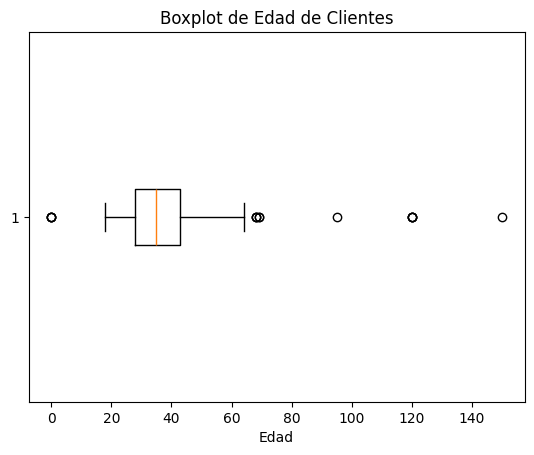

In [68]:
import matplotlib.pyplot as plt

# Aseguramos tipo numérico
df_unificado["Edad"] = pd.to_numeric(df_unificado["Edad"], errors="coerce")

plt.figure()
plt.boxplot(df_unificado["Edad"].dropna(), vert=False)
plt.title("Boxplot de Edad de Clientes")
plt.xlabel("Edad")
plt.show()


En este punto, es necesario analizar qué hacer con estos outliers, principalmente con los valores que esta analista  considera como errores de registro. En ese sentido se consideran dos opciones: marcarlas como nulas y luego imputar usando una medida robusta como la mediana. O bien, eliminar estos registros. Eligiendo la primera opción, atendido que, no se inventan valores arbitrarios, se mantiene el tamaño del dataset, es coherente con limpieza de datos reales y evita que esos valores distorsionen estadísticas.

<b>Primero defino un rango válido para la edad</b>

In [69]:
df_unificado.loc[(df_unificado["Edad"] < 18) | (df_unificado["Edad"] > 90),"Edad"] = np.nan

<b>Luego imputo con la mediana</b>

In [70]:
df_unificado["Edad"] = df_unificado["Edad"].fillna(df_unificado["Edad"].median())

Se guarda el DataFrame limpio tanto en CSV como en Excel para ser usado en la siguiente etapa.

In [71]:
df_unificado_limpio = df_unificado.copy()

df_unificado_limpio.to_csv(
    "dataset_unificado_limpio.csv",
    index=False,
    encoding="utf-8-sig"
)

df_unificado_limpio.to_excel(
    "dataset_unificado_limpio.xlsx",
    index=False
)


<font color="white" size="5"> Documentar las decisiones tomadas y cómo impactan en la calidad del dataset. </font>

En esta etapa se abordó la limpieza del DataFrame consolidado mediante la identificación y tratamiento de valores nulos y la detección de outliers, con el objetivo de mejorar la calidad y consistencia de los datos antes de avanzar a etapas de análisis más profundas. Este proceso es clave para asegurar que los resultados posteriores sean confiables y representativos.

En primer lugar, se realizó una revisión de valores faltantes, detectándose nulos tanto en variables numéricas como categóricas. Para su tratamiento se aplicaron estrategias diferenciadas según el tipo de dato: en variables numéricas, como la edad, se utilizó imputación mediante la mediana por su robustez frente a valores extremos; mientras que en variables categóricas, en el caso de la ciudad se optó por imputar por la moda (ya que representaban menos del 2%) y en la variable Categoria se optó por imputar con una categoría explícita ("Desconocido"), evitando la pérdida de registros. En el caso del valor del dólar, al tratarse de una serie temporal, se aplicó imputación por propagación temporal (con ffill y bfill), aprovechando la continuidad del dato en el tiempo.

Posteriormente, se realizó la detección de valores atípicos utilizando técnicas estadísticas como el rango intercuartílico (IQR) y el Z-score, aplicadas a variables numéricas relevantes. Estos métodos permitieron identificar observaciones que se alejan del comportamiento esperado de la distribución. En esta etapa, los outliers no fueron eliminados (solo se imputaron las edades con la mediana), ya que su detección tiene un carácter exploratorio y algunos pueden representar comportamientos reales del negocio.

En conjunto, las decisiones tomadas en esta lección permitieron mejorar la completitud y coherencia del dataset, sentando una base sólida para los análisis y transformaciones que se desarrollarán en las siguientes etapas del proyecto.


<font color="white" size="5">Lección 5 - DATA WRANGLING</font>

<font color="brown" size="4"> Transformar y enriquecer los datos mediante técnicas de manipulación avanzada.</font>



Tomar el DataFrame limpio de la lección 4

In [72]:
df_data = df_unificado_limpio.copy()


<b>Aplicar técnicas de Data Wrangling</b>

Verifico regristro duplicados

In [73]:
df_data.duplicated().sum()

np.int64(44)

Se eliminan valores duplicados y se comprueba

In [74]:
df_data.drop_duplicates(inplace=True)
df_data.duplicated().sum()

np.int64(0)

Imprimo para observar el nuevo dataframe principalmente sus columnas

In [75]:
df_data.head()

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar
1437,130,2025-01-07,Belleza,75279,578,Lucas Pérez,54.0,Antofagasta,4,199345,1010.98
2076,325,2025-01-12,Belleza,26102,1439,Catalina Silva,30.0,Antofagasta,9,160227,1010.98
2055,23,2025-02-05,Desconocido,18901,104,Valentina Muñoz,29.0,SANTIAGO,8,137927,977.58
131,235,2025-02-05,Electrónica,49302,1069,Benjamín Muñoz,29.0,Santiago,3,91475,977.58
251,71,2025-02-05,Belleza,34226,333,Fernanda Flores,28.0,Santiago,2,58250,977.58


In [76]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2221 entries, 1437 to 1138
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID_Cliente        2221 non-null   int64         
 1   Fecha             2221 non-null   datetime64[ns]
 2   Categoria         2221 non-null   object        
 3   Monto             2221 non-null   int64         
 4   ID_Transaccion    2221 non-null   int64         
 5   Nombre            2221 non-null   object        
 6   Edad              2221 non-null   float64       
 7   Ciudad            2221 non-null   object        
 8   Cantidad_Compras  2221 non-null   int64         
 9   Monto_Total       2221 non-null   int64         
 10  Valor_Dolar       2221 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 208.2+ KB


Transformación de tipos de datos: Edad a entero, Monto y Monto_total como float y Ciudad como categoría

In [77]:
df_data["Edad"] = df_data["Edad"].astype(int)
df_data["Monto"] = df_data["Monto"].astype(float)
df_data["Monto_Total"] = df_data["Monto_Total"].astype(float)
df_data["Ciudad"] = df_data["Ciudad"].astype("category")

Asimismo, se observa inconsistencia en la columna ciudades, algunas están con mayúscula, lo que podría afectar a posteriores análisis, por lo que se transforma esta columna para que todas queden en formato título.

In [78]:
df_data["Ciudad"] = df_data["Ciudad"].str.strip().str.title()

Crear nuevas columnas calculadas.

Asumiendo que Monto y Monto_Total están en pesos, se crean dos nuevas columnas, una de ellas tendrá el Monto_USD que será el Monto por el valor del dolar en la fecha de la transacción y la otra será el Monto_total_USD, que será el Monto_total por el valor del dólar en la fecha de tansacción asociada.

In [79]:
df_data["Monto_USD"] = df_data["Monto"] * df_data["Valor_Dolar"]
df_data["Monto_total_USD"] = df_data["Monto_Total"] * df_data["Valor_Dolar"]
df_data.head()


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,Monto_USD,Monto_total_USD
1437,130,2025-01-07,Belleza,75279.0,578,Lucas Pérez,54,Antofagasta,4,199345.0,1010.98,76105563.42,2.015338e+08
2076,325,2025-01-12,Belleza,26102.0,1439,Catalina Silva,30,Antofagasta,9,160227.0,1010.98,26388599.96,1.619863e+08
2055,23,2025-02-05,Desconocido,18901.0,104,Valentina Muñoz,29,Santiago,8,137927.0,977.58,18477239.58,1.348347e+08
131,235,2025-02-05,Electrónica,49302.0,1069,Benjamín Muñoz,29,Santiago,3,91475.0,977.58,48196649.16,8.942413e+07
251,71,2025-02-05,Belleza,34226.0,333,Fernanda Flores,28,Santiago,2,58250.0,977.58,33458653.08,5.694404e+07


Aplicar funciones personalizadas (apply(), map(), lambda).

La variable Monto_Total fue DISCRETIZADA en tres niveles de gasto (Bajo, Medio y Alto), para esto se utiliza apply y lambda

In [80]:
df_data["Nivel_gasto_total"] = df_data["Monto_Total"].apply(
    lambda x: "Bajo" if x < 80000 else "Medio" if x < 250000 else "Alto")

df_data.head()


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,Monto_USD,Monto_total_USD,Nivel_gasto_total
1437,130,2025-01-07,Belleza,75279.0,578,Lucas Pérez,54,Antofagasta,4,199345.0,1010.98,76105563.42,2.015338e+08,Medio
2076,325,2025-01-12,Belleza,26102.0,1439,Catalina Silva,30,Antofagasta,9,160227.0,1010.98,26388599.96,1.619863e+08,Medio
2055,23,2025-02-05,Desconocido,18901.0,104,Valentina Muñoz,29,Santiago,8,137927.0,977.58,18477239.58,1.348347e+08,Medio
131,235,2025-02-05,Electrónica,49302.0,1069,Benjamín Muñoz,29,Santiago,3,91475.0,977.58,48196649.16,8.942413e+07,Medio
251,71,2025-02-05,Belleza,34226.0,333,Fernanda Flores,28,Santiago,2,58250.0,977.58,33458653.08,5.694404e+07,Bajo


Se organizan las categorías en unas nuevas con map

In [81]:
map_categoria = {
    "Electrónica": "Tecnología",
    "Hogar": "Hogar",
    "Moda": "Vestuario",
    "Deportes": "Deportes",
    "Juguetes": "Entretenimiento",
    "Belleza": "Cuidado personal",
    "Alimentos": "Alimentos",
    "Desconocido": "No especificado"
}

df_data["Nueva_Categoria"] = df_data["Categoria"].map(map_categoria)
df_data.head()


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,Monto_USD,Monto_total_USD,Nivel_gasto_total,Nueva_Categoria
1437,130,2025-01-07,Belleza,75279.0,578,Lucas Pérez,54,Antofagasta,4,199345.0,1010.98,76105563.42,2.015338e+08,Medio,Cuidado personal
2076,325,2025-01-12,Belleza,26102.0,1439,Catalina Silva,30,Antofagasta,9,160227.0,1010.98,26388599.96,1.619863e+08,Medio,Cuidado personal
2055,23,2025-02-05,Desconocido,18901.0,104,Valentina Muñoz,29,Santiago,8,137927.0,977.58,18477239.58,1.348347e+08,Medio,No especificado
131,235,2025-02-05,Electrónica,49302.0,1069,Benjamín Muñoz,29,Santiago,3,91475.0,977.58,48196649.16,8.942413e+07,Medio,Tecnología
251,71,2025-02-05,Belleza,34226.0,333,Fernanda Flores,28,Santiago,2,58250.0,977.58,33458653.08,5.694404e+07,Bajo,Cuidado personal


Normalizar o discretizar columnas según sea necesario

Normalización de Monto (Min–Max), transformando los valores originales a una escala común entre 0 y 1.

In [82]:
df_data["Monto_norm"] = (
    (df_data["Monto"] - df_data["Monto"].min()) /
    (df_data["Monto"].max() - df_data["Monto"].min())
)
df_data.head()

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,Monto_USD,Monto_total_USD,Nivel_gasto_total,Nueva_Categoria,Monto_norm
1437,130,2025-01-07,Belleza,75279.0,578,Lucas Pérez,54,Antofagasta,4,199345.0,1010.98,76105563.42,2.015338e+08,Medio,Cuidado personal,0.039382
2076,325,2025-01-12,Belleza,26102.0,1439,Catalina Silva,30,Antofagasta,9,160227.0,1010.98,26388599.96,1.619863e+08,Medio,Cuidado personal,0.013132
2055,23,2025-02-05,Desconocido,18901.0,104,Valentina Muñoz,29,Santiago,8,137927.0,977.58,18477239.58,1.348347e+08,Medio,No especificado,0.009288
131,235,2025-02-05,Electrónica,49302.0,1069,Benjamín Muñoz,29,Santiago,3,91475.0,977.58,48196649.16,8.942413e+07,Medio,Tecnología,0.025516
251,71,2025-02-05,Belleza,34226.0,333,Fernanda Flores,28,Santiago,2,58250.0,977.58,33458653.08,5.694404e+07,Bajo,Cuidado personal,0.017468


<font size="4"> Guardar la nueva versión del DataFrame optimizado.</font> En este caso se prefiere dejarlo en formato Excel por su claridad y orden.

In [83]:
df_data.to_excel("dataset_unificado_optimizado.xlsx",index=False)


En la Lección 5 se aplicaron técnicas de Data Wrangling sobre el DataFrame limpio, enfocadas en mejorar y enriquecer la estructura de los datos. Se eliminaron registros duplicados, se ajustaron los tipos de datos y se crearon nuevas variables calculadas, como montos en USD, montos normalizados y clasificaciones por nivel de gasto. Además, se aplicaron funciones personalizadas y procesos de normalización y discretización para facilitar el análisis y la segmentación. Finalmente, el DataFrame optimizado fue exportado a formato Excel para su uso en las siguientes etapas del proyecto.

<font color="white" size="5">Lección 6 - Agrupamiento y pivoteo de datos</font>

<font color="brown" size="4">Organizar y estructurar los datos para el análisis utilizando técnicas de agrupamiento y pivotado</font>

Tomar el DataFrame ﬁnal de la Lección 5

In [84]:
df_final=df_data.copy()

 Aplicar técnicas de agrupamiento (groupby()) para obtener métricas resumidas

Por ciudad vemos el total de transacciones ocupando contador, el gasto total o suma de los montos de cada ciudad y el promedio de éstos. Esto permite comparar comportamiento de consumo entre ciudades.

In [85]:
resumen_ciudad = (df_final.groupby("Ciudad").agg(
          Total_transacciones=("Monto", "count"),
          Gasto_total=("Monto", "sum"),
          Gasto_promedio=("Monto", "mean")
      )
      .reset_index()
)
resumen_ciudad

,Ciudad,Total_transacciones,Gasto_total,Gasto_promedio
0,Antofagasta,195,6809600.0,34921.025641
1,Concepción,229,6773778.0,29579.816594
2,La Serena,174,4486680.0,25785.517241
3,Rancagua,48,1775172.0,36982.750000
4,Santiago,1058,32700127.0,30907.492439
5,Talca,76,4038019.0,53131.828947
6,Temuco,177,5412398.0,30578.519774
7,Valparaíso,264,9607033.0,36390.276515


Luego se agrupa segun nivel de gasto total (Monto_total), utilizando el valor del monto total gastado, observando la cantidad de clientes por nivel y el promedio de gasto

In [86]:
resumen_nivel_gasto = (
    df_final.groupby("Nivel_gasto_total")
      .agg(
          Clientes=("ID_Cliente", "nunique"),
          Gasto_promedio=("Monto_Total", "mean")
      )
      .reset_index()
)
resumen_nivel_gasto

,Nivel_gasto_total,Clientes,Gasto_promedio
0,Alto,50,389359.516616
1,Bajo,180,53488.151737
2,Medio,269,146751.678332


Resumen por clientes: se observa, por ID_Cliente, el total de transacciones realizadas y el gasto total (considerando el Monto gastado)

In [87]:
resumen_clientes = (
    df_final.groupby("ID_Cliente")
      .agg(
          Total_transacciones=("Monto", "count"),
          Gasto_total_tx=("Monto", "sum"),
      )
      .reset_index()
)
resumen_clientes

,ID_Cliente,Total_transacciones,Gasto_total_tx
0,1,3,90051.0
1,2,5,114194.0
2,3,3,41011.0
3,4,6,101954.0
4,5,3,143745.0
...,...,...,...
494,496,4,164253.0
495,497,3,52411.0
496,498,3,42675.0
497,499,1,3813.0


Reestructurar los datos utilizando pivot() y melt().

Reestructuración con pivot()-Se aplica pivot para hacer un reporte por ciudad y categoría de acuerdo al monto gastado

In [88]:
Pivot_ciudad_categoria = df_final.pivot_table(
    values="Monto",
    index="Ciudad",
    columns="Nueva_Categoria",
    aggfunc="sum",
    fill_value=0
)
Pivot_ciudad_categoria

Nueva_Categoria,Alimentos,Cuidado personal,Deportes,Entretenimiento,Hogar,No especificado,Tecnología,Vestuario
Ciudad,,,,,,,,
Antofagasta,606806.0,1264527.0,910713.0,370531.0,957656.0,92635.0,1457809.0,1148923.0
Concepción,669086.0,1275299.0,427665.0,1190218.0,683532.0,15517.0,1326555.0,1185906.0
La Serena,506952.0,944194.0,384380.0,452642.0,767447.0,60748.0,506530.0,863787.0
Rancagua,193250.0,100265.0,116746.0,252728.0,197542.0,87663.0,268974.0,558004.0
Santiago,3642154.0,5236753.0,3651098.0,3080755.0,4922586.0,592282.0,6162802.0,5411697.0
Talca,101935.0,1843863.0,145092.0,202714.0,322604.0,0.0,299076.0,1122735.0
Temuco,579044.0,873075.0,969223.0,449435.0,793799.0,101702.0,601303.0,1044817.0
Valparaíso,873782.0,1048962.0,1285187.0,714018.0,1230729.0,79922.0,3106335.0,1268098.0


Reestructuración con melt()-se vuelve a formato largo para análisis flexible, de los mismas variables analizadas con pivot

In [89]:
melt_ciudad_categoria = Pivot_ciudad_categoria.reset_index().melt(
    id_vars="Ciudad",
    var_name="Categoria",
    value_name="Monto_Total"
)
melt_ciudad_categoria

,Ciudad,Categoria,Monto_Total
0,Antofagasta,Alimentos,606806.0
1,Concepción,Alimentos,669086.0
2,La Serena,Alimentos,506952.0
3,Rancagua,Alimentos,193250.0
4,Santiago,Alimentos,3642154.0
...,...,...,...
59,Rancagua,Vestuario,558004.0
60,Santiago,Vestuario,5411697.0
61,Talca,Vestuario,1122735.0
62,Temuco,Vestuario,1044817.0


Combinar nuevas fuentes de ser necesario con merge() y concat().


POR EJEMPLO: puedo unir el resumen por cliente realizado con el dataset principal con merge y queda:

In [90]:
df_unido_a_cliente = df_final.merge(
    resumen_clientes,
    on="ID_Cliente",
    how="left"
)
df_unido_a_cliente

,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,Monto_USD,Monto_total_USD,Nivel_gasto_total,Nueva_Categoria,Monto_norm,Total_transacciones,Gasto_total_tx
0,130,2025-01-07,Belleza,75279.0,578,Lucas Pérez,54,Antofagasta,4,199345.0,1010.98,76105563.42,2.015338e+08,Medio,Cuidado personal,0.039382,4,198807.0
1,325,2025-01-12,Belleza,26102.0,1439,Catalina Silva,30,Antofagasta,9,160227.0,1010.98,26388599.96,1.619863e+08,Medio,Cuidado personal,0.013132,9,326044.0
2,23,2025-02-05,Desconocido,18901.0,104,Valentina Muñoz,29,Santiago,8,137927.0,977.58,18477239.58,1.348347e+08,Medio,No especificado,0.009288,8,133591.0
3,235,2025-02-05,Electrónica,49302.0,1069,Benjamín Muñoz,29,Santiago,3,91475.0,977.58,48196649.16,8.942413e+07,Medio,Tecnología,0.025516,3,91766.0
4,71,2025-02-05,Belleza,34226.0,333,Fernanda Flores,28,Santiago,2,58250.0,977.58,33458653.08,5.694404e+07,Bajo,Cuidado personal,0.017468,2,59120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,382,2026-02-04,Belleza,18995.0,1705,Antonia Sepúlveda,46,Concepción,4,74619.0,911.18,17307864.10,6.799134e+07,Bajo,Cuidado personal,0.009338,4,74336.0
2217,388,2026-02-04,Hogar,13711.0,1730,Ignacio Muñoz,58,Santiago,7,71668.0,911.18,12493188.98,6.530245e+07,Bajo,Hogar,0.006518,7,76068.0
2218,233,2026-03-01,Moda,2107.0,1061,Ana Torres,22,Santiago,5,33203.0,911.18,1919856.26,3.025391e+07,Bajo,Vestuario,0.000324,5,36978.0
2219,99,2026-03-01,Belleza,41452.0,453,Lucas Silva,34,Talca,6,283508.0,911.18,37770233.36,2.583268e+08,Alto,Cuidado personal,0.021325,6,284526.0


Respecto a la función concat(), ésta permite unir DataFrames apilando filas o columnas sin realizar cruces por claves. Cuando los DataFrames presentan estructuras distintas, Pandas genera valores nulos en aquellas columnas sin correspondencia. Es por esto que en este caso no se utiliza.

Ordeno el Dataframe por ID_Cliente para su posterior exportación

In [91]:
df_unido_a_cliente = df_unido_a_cliente.sort_values(by="ID_Cliente").reset_index(drop=True)

df_unido_a_cliente.head()


,ID_Cliente,Fecha,Categoria,Monto,ID_Transaccion,Nombre,Edad,Ciudad,Cantidad_Compras,Monto_Total,Valor_Dolar,Monto_USD,Monto_total_USD,Nivel_gasto_total,Nueva_Categoria,Monto_norm,Total_transacciones,Gasto_total_tx
0,1,2025-02-06,Alimentos,43234.0,3,Sofía Céspedes,26,La Serena,3,86427.0,969.47,41914065.98,8.378838e+07,Medio,Alimentos,0.022277,3,90051.0
1,1,2025-03-22,Hogar,25454.0,2,Sofía Céspedes,26,La Serena,3,86427.0,926.15,23574222.10,8.004437e+07,Medio,Hogar,0.012786,3,90051.0
2,1,2025-07-05,Alimentos,21363.0,1,Sofía Céspedes,26,La Serena,3,86427.0,927.87,19822086.81,8.019302e+07,Medio,Alimentos,0.010602,3,90051.0
3,2,2025-09-29,Alimentos,11319.0,5,Fernanda Vergara,46,Temuco,5,114303.0,958.90,10853789.10,1.096051e+08,Medio,Alimentos,0.005241,5,114194.0
4,2,2025-09-02,Desconocido,11121.0,8,Fernanda Vergara,46,Temuco,5,114303.0,968.35,10769020.35,1.106853e+08,Medio,No especificado,0.005135,5,114194.0


<b>Exportar el DataFrame ﬁnal listo para análisis en formatos CSV y Excel</b>

En este caso el Dataframe final será el que se unió al resumen por clientes agregado en esta lección. Toda vez que no cambió nada más desde la lección anterior, ya que en esta etapa se realizaron técnicas de combinación, unión, orden y agrupación para análisis. Se guarda tanto en CSV como en Excel.

In [92]:
df_unido_a_cliente.to_csv("dataset_final_analisis.csv",index=False,encoding="utf-8-sig")

df_unido_a_cliente.to_excel("dataset_final_analisis.xlsx", index=False)


<font color="brown" size="5">Elaborar un documento resumen explicando todo el ﬂujo de trabajo realizado, desde la Lección 1 hasta la Lección 6</font>

Lección 1 – Generación de datos

Se utilizaron arrays de NumPy para generar datasets ficticios de transacciones y clientes, aplicando distribuciones estadísticas realistas. Los datos se almacenaron en formatos intermedios para su posterior uso en Pandas.

Lección 2 – Carga y estructuración

Los datos generados fueron cargados en DataFrames, verificando su estructura, tipos de datos y consistencia general.

Lección 3 – Integración de fuentes

Se unificaron distintas fuentes de datos (clientes, transacciones y valores externos del dólar obtenidos desde página web SII), resolviendo diferencias de formato y estructura.

Lección 4 – Limpieza de datos

Se identificaron y trataron valores nulos y outliers mediante imputación, análisis estadístico y criterios de negocio, mejorando la calidad del dataset.

Lección 5 – Data Wrangling

Se eliminaron duplicados, se transformaron tipos de datos, se crearon nuevas variables calculadas, y se aplicaron procesos de normalización y discretización, dejando un dataset optimizado.

Lección 6 – Agregación y reestructuración

Se aplicaron técnicas de agrupamiento, pivot y melt para generar métricas resumidas y estructuras analíticas. Finalmente, se exportó el dataset final en formatos CSV y Excel, listo para análisis y visualización.